In [1]:
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.automap import automap_base

# Create a base class for declaring class definitions to produce Table objects
Base = sqlalchemy.orm.declarative_base()

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
-----------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
-----------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [6]:
# Declare a Base 
Base = automap_base()

# reflect to database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
result = session.query(func.max(measurement.date)).scalar()
result

'2017-08-23'

Text(0, 0.5, 'Precipitation (in)')

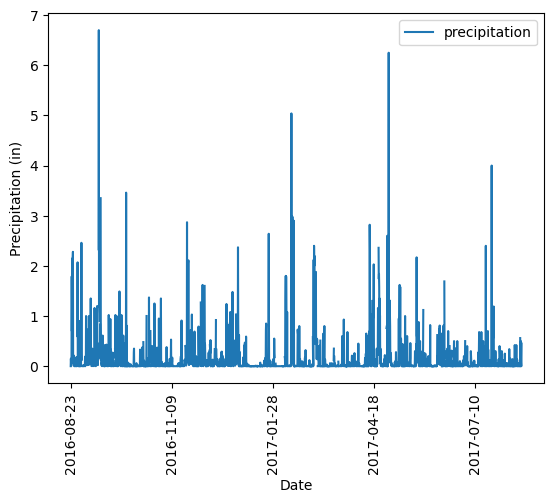

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement).filter(measurement.date >= '2016-08-23').order_by(measurement.date.asc()).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame([(result.date, result.prcp) for result in results], 
                  columns=['date','precipitation'])
# Sort the dataframe by date
df_sorted = df.sort_values(by = 'date', ascending = True).reset_index(drop = True)

df_sorted.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
stat_count = session.query(station).count()
stat_count

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stat_activity = session.query(measurement.station, func.count(measurement.date)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).\
    all()

print(stat_activity)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(measurement.station, measurement.tobs).filter(measurement.station == 'USC00519281').all()
df1 = pd.DataFrame(results)

lowest = df1.tobs.min()
highest = df1.tobs.max()
average = df1.tobs.mean()

print(f"Lowest: {lowest}, Highest: {highest}, Average: {average}")

Lowest: 54.0, Highest: 85.0, Average: 71.66378066378067


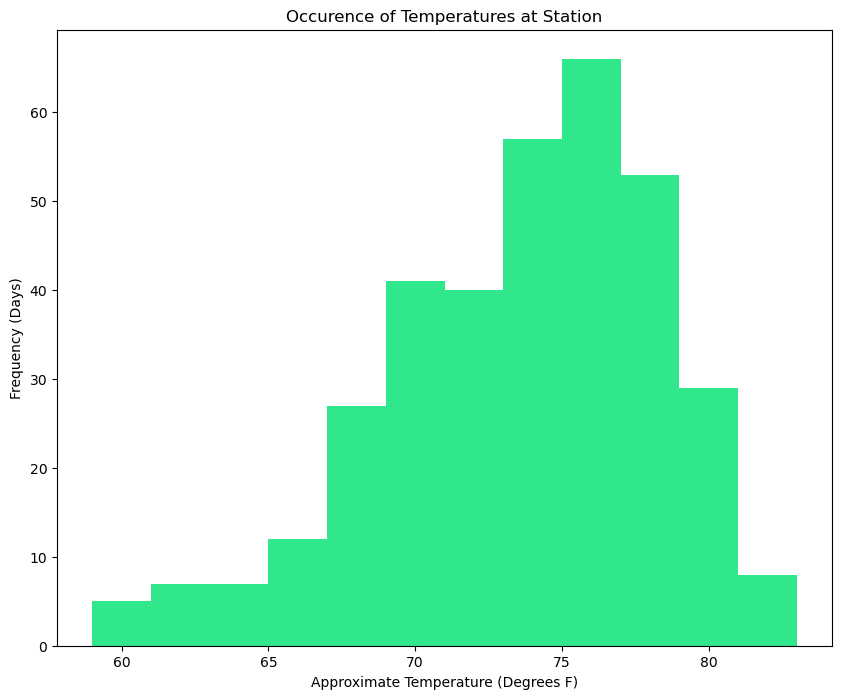

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').\
    order_by(measurement.date.asc()).all()

df2 = pd.DataFrame(results)

plt.figure(figsize=(10,8))

plt.hist(df2.tobs, bins =12, color = "#30e78b")
plt.xlabel("Approximate Temperature (Degrees F)")
plt.ylabel("Frequency (Days)")
plt.title("Occurence of Temperatures at Station")

plt.show()

# Close Session

In [17]:
# Close Session
session.close()